# Sentimental Analysis Visualization

### Performing the sentimental analysis using vader and creating some data frames or future visualization

In [45]:
import numpy as np
import pandas as pd
from dataprep import clean_text
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.image as mpimg

stopwords = set({'legend','apex','legends'})
analyser = SentimentIntensityAnalyzer()
tweet_data = pd.read_csv("tweet_data_cleaned.csv")
scores = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(tweet_data['Text'].shape[0]):
    compound = analyser.polarity_scores(tweet_data['Text'][i])["compound"]
    pos = analyser.polarity_scores(tweet_data['Text'][i])["pos"]
    neu = analyser.polarity_scores(tweet_data['Text'][i])["neu"]
    neg = analyser.polarity_scores(tweet_data['Text'][i])["neg"]

    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
sentiments_score = pd.DataFrame.from_dict(scores)
tweet_data = tweet_data.join(sentiments_score)

listpositive = tweet_data[tweet_data['Compound'] >= 0.05] 
listnegative = tweet_data[tweet_data['Compound'] <= -0.05]
listneutral = tweet_data[tweet_data['Compound'].between(-0.05,0.05)] 
HTpositive = tweet_data['Hashtags'][tweet_data['Compound'] >= 0.05] 
HTnegative = tweet_data['Hashtags'][tweet_data['Compound'] <= -0.05]
HTneutral = tweet_data['Hashtags'][tweet_data['Compound'].between(-0.05,0.05)] 

Hashtags = pd.DataFrame(
    {'HTpositive': HTpositive,
     'HTnegative': HTnegative,
     'HTneutral': HTneutral
    })
Hashtags = Hashtags.dropna()




## A word cloud for all words

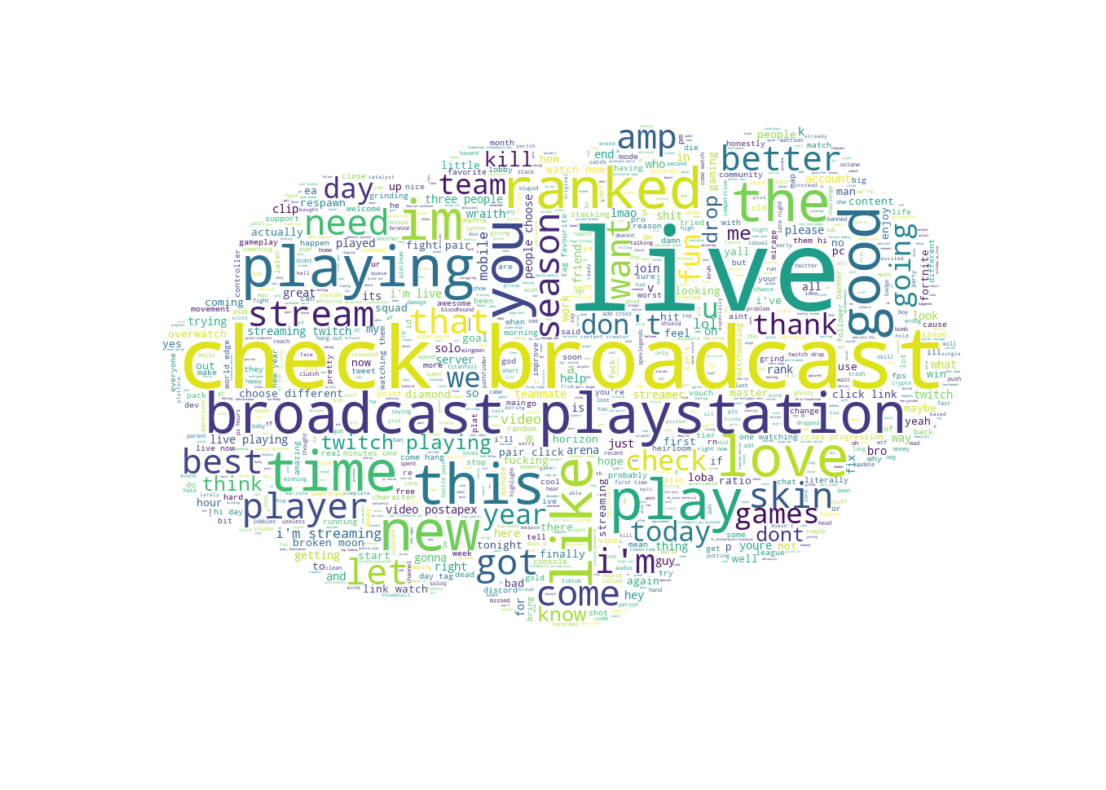

In [57]:
stopwords = set({'legend','apex','legends','game',"it","i"})
allwords = ' '.join([text for text in tweet_data['Unlemmatize']])
mask = np.array(Image.open("cloud.png")) 
wc = WordCloud(background_color="white", mask = mask,  stopwords=stopwords, max_words=1000,repeat=True).generate(str(allwords)) 
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## A word cloud for positive tweets

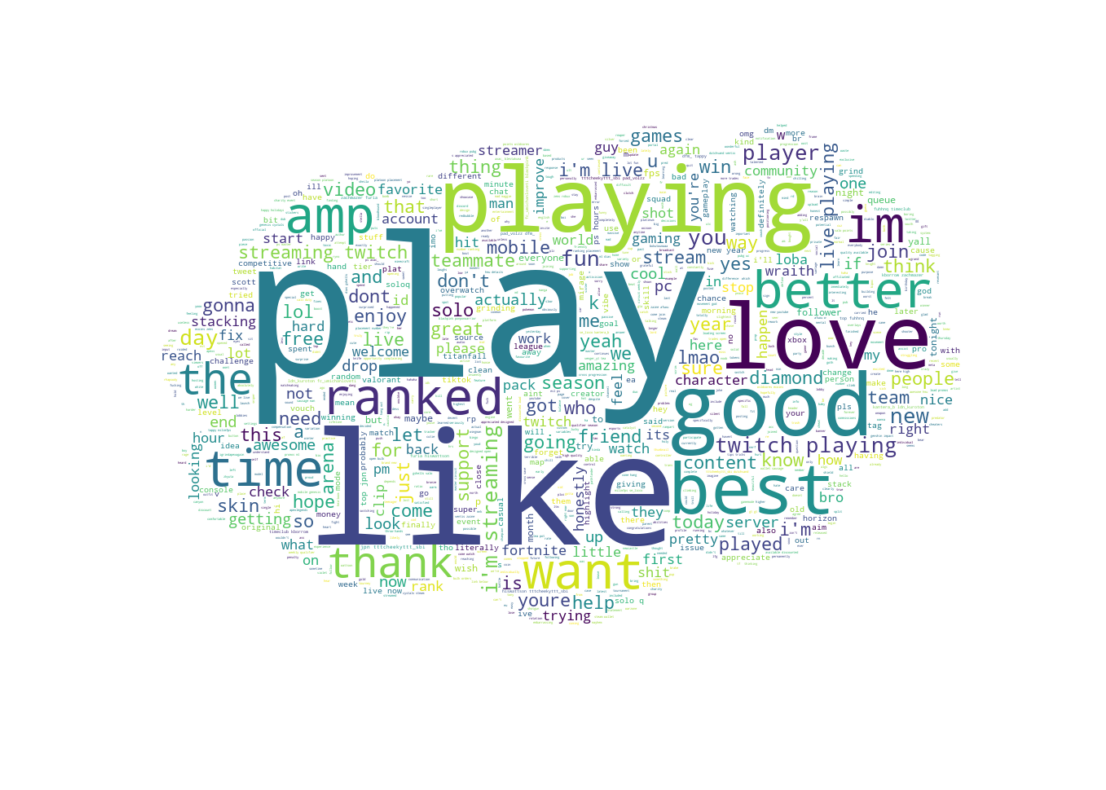

In [58]:
stopwords = set({'legend','apex','legends','game',"it","i"})
allwords = ' '.join([text for text in listpositive['Unlemmatize']])
mask = np.array(Image.open("cloud.png")) 
wc = WordCloud(background_color="white", mask = mask,  stopwords=stopwords, max_words=1000,repeat=True).generate(str(allwords)) 
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## A word cloud for negative tweets

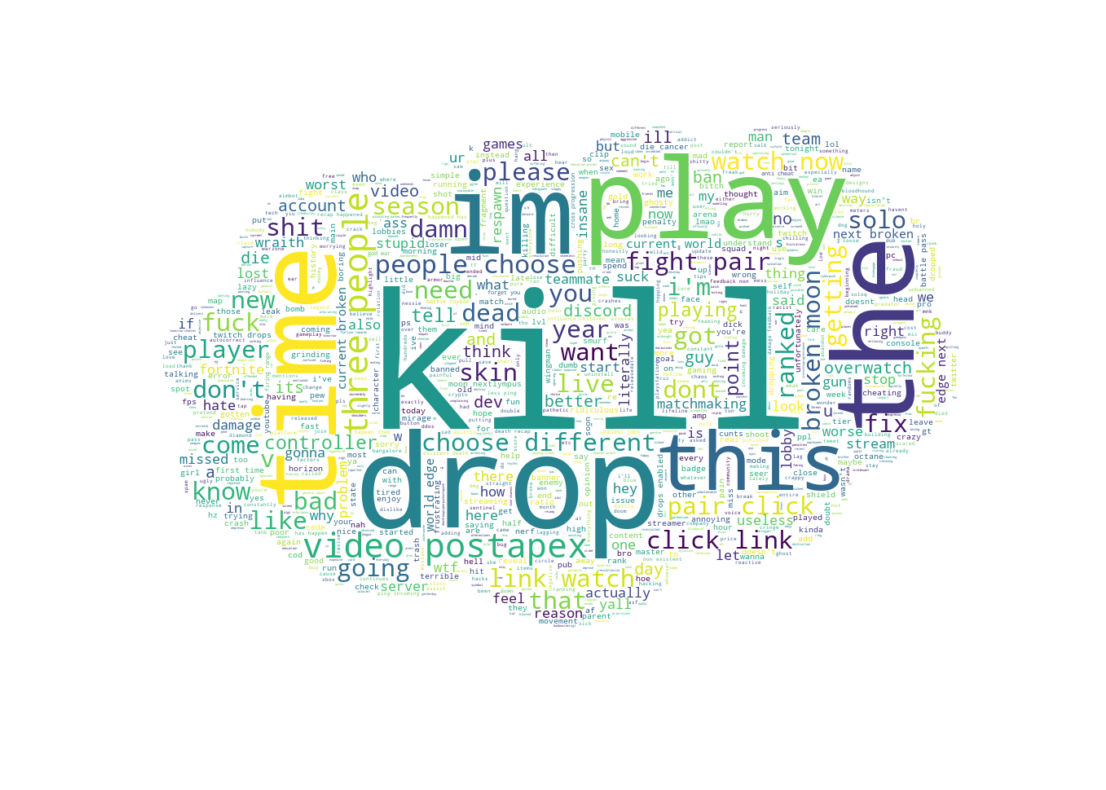

In [59]:
stopwords = set({'legend','apex','legends','game',"it","i"})
allwords = ' '.join([text for text in listnegative['Unlemmatize']])
mask = np.array(Image.open("cloud.png")) 
wc = WordCloud(background_color="white", mask = mask,  stopwords=stopwords, max_words=1000,repeat=True).generate(str(allwords)) 
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Empty DataFrame
Columns: [HTpositive, HTnegative, HTneutral]
Index: []
